In [3]:
from basic_data_inspection import *
from missing_values import *
from univariate_analysis import *
from bivarates_analysis import *
from multivariates_analysis import *

In [14]:
data_path = '../data/insurance.csv'
df = pd.read_csv(data_path)

In [15]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.Inspect(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [16]:
data_inspector = DataInspector(SummaryStatisticsInspectionStrategy())
data_inspector.Inspect(df)

Summary Statistics(NumericalFeatures):
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Summary Statistics(CategoricalFeatures):
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


## Insights on the DataFrame

The DataFrame contains 1338 entries with 7 columns. Here is a summary of the columns and their data types:

- **age**: 1338 non-null values, type `int64`
- **sex**: 1338 non-null values, type `object`
- **bmi**: 1338 non-null values, type `float64`
- **children**: 1338 non-null values, type `int64`
- **smoker**: 1338 non-null values, type `object`
- **region**: 1338 non-null values, type `object`
- **charges**: 1338 non-null values, type `float64`

The columns `age`, `children`, and `charges` are numeric types (`int64` and `float64`), while the columns `sex`, `smoker`, and `region` are categorical types (`object`).



## Summary Statistics

### Numerical Features:
| Statistic | `Age`         | `BMI`         | `Children`    | `Charges`       |
|-----------|-------------|-------------|-------------|---------------|
| Count     | 1338        | 1338        | 1338        | 1338          |
| Mean      | 39.21       | 30.66       | 1.09        | 13270.42      |
| Std Dev   | 14.05       | 6.10        | 1.21        | 12110.01      |
| Min       | 18.00       | 15.96       | 0.00        | 1121.87       |
| 25%       | 27.00       | 26.30       | 0.00        | 4740.29       |
| Median    | 39.00       | 30.40       | 1.00        | 9382.03       |
| 75%       | 51.00       | 34.69       | 2.00        | 16639.91      |
| Max       | 64.00       | 53.13       | 5.00        | 63770.43      |

### Categorical Features:
| Feature | Count | Unique | Top       | Frequency |
|---------|-------|--------|-----------|-----------|
| Sex     | 1338  | 2      | Male      | 676       |
| Smoker  | 1338  | 2      | No        | 1064      |
| Region  | 1338  | 4      | Southeast | 364       |

In [17]:
missing_values = SimplMissingValuesAnalyser()
missing_values.identify_missing_values(df)

Missing Values:
Series([], dtype: int64)


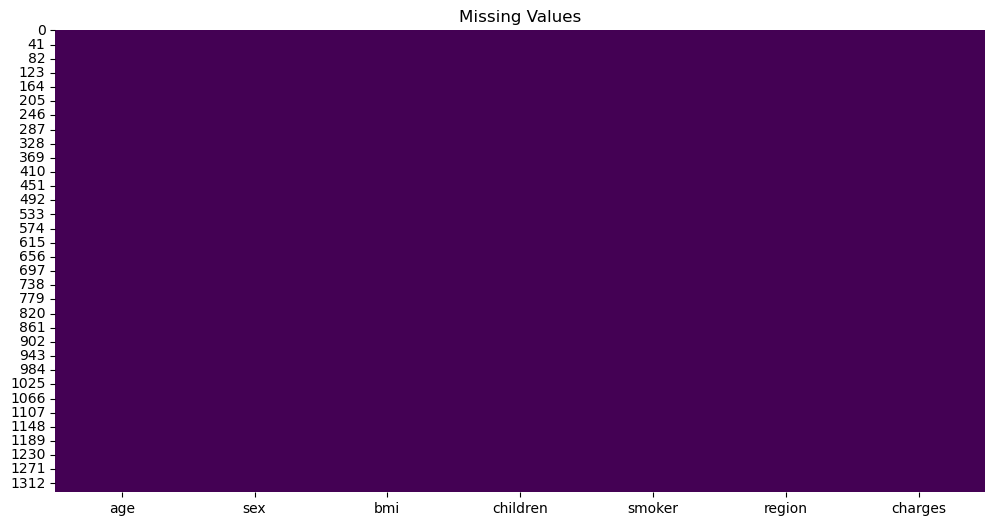

In [18]:
missing_values.plot_missing_values(df)

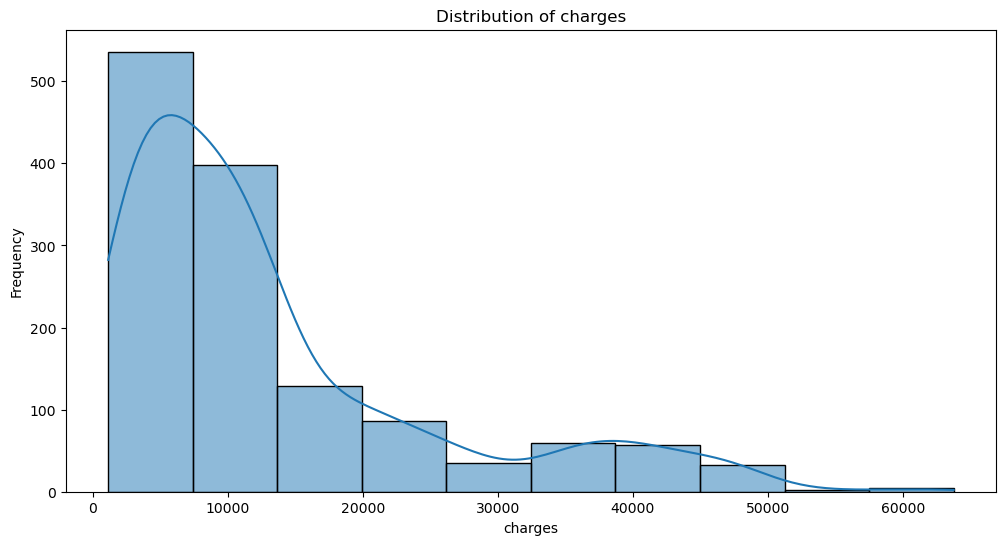

In [19]:
num_univarates_analysis = NumericalUnivaratesAnalysis()
num_univarates_analysis.analyze(df, 'charges')

## Why Normalize?

The target variable `charges` has a right-skewed distribution, meaning that most values are concentrated on the lower end while a few high values extend far to the right. This can lead to several issues in linear regression:

**Violates normality assumption**: Linear regression assumes that residuals (errors) are normally distributed. A skewed target variable often results in skewed residuals.

**High leverage of extreme values**: Outliers (very high charges) can disproportionately influence the model.

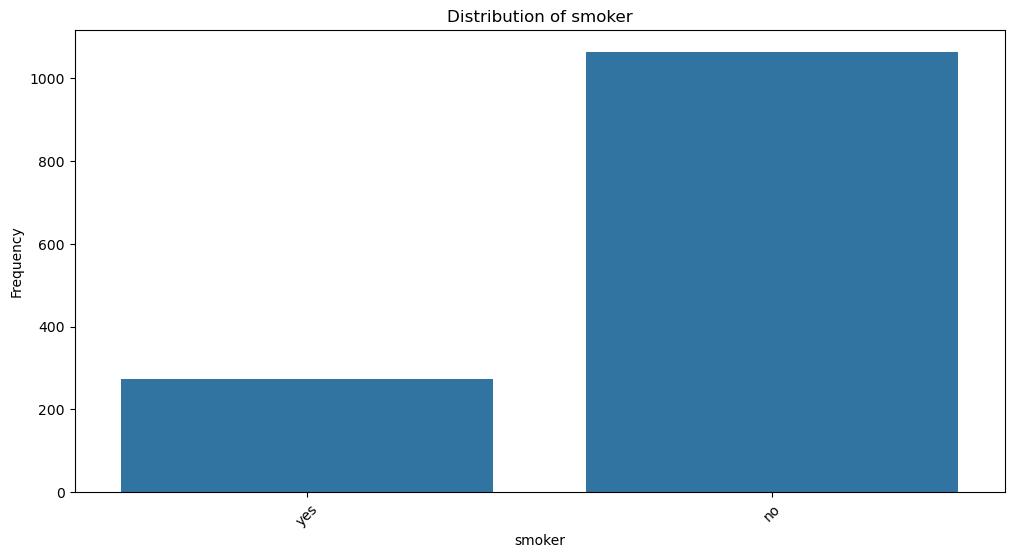

In [22]:
cat_univarates_analysis = CategoricalUnivaratesAnalysis()
cat_univarates_analysis.analyze(df, 'smoker')

## Dealing with Imbalanced Categorical Data

The histogram of categorical data (e.g., `smoker` vs. non-`smoker`) shows an unequal distribution between the two classes. This imbalance can lead to overfitting, where the model learns to favor the majority class and performs poorly on the minority class. Here’s why we should be careful:

Bias in Predictions: The model may become biased towards predicting the majority class (non-`smokers`), leading to poor generalization.

Poor Performance on Minority Class: If the dataset is highly imbalanced, the model may struggle to correctly predict the minority class (`smokers`), reducing its usefulness.

Misleading Metrics: Accuracy alone may be misleading in imbalanced datasets. For instance, if 80% of patients are non-`smokers`, predicting "non-`smoker`" for everyone would still yield 80% accuracy but would be a poor model.

How to Handle Imbalanced Data?

To address this issue, consider the following strategies:

Resampling Techniques: Use oversampling (e.g., SMOTE) or undersampling to balance the dataset.

Class Weights: Assign higher weights to the minority class to improve learning.

Alternative Metrics: Use precision, recall, and F1-score instead of accuracy.

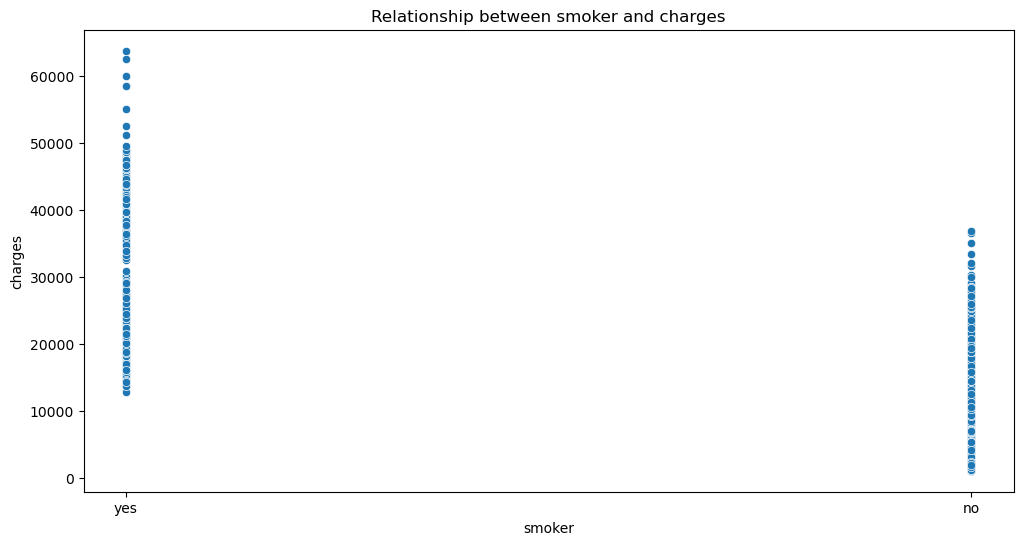

In [23]:
num_bivarates_analysis = NumericalvsNumericalAnalysis()
num_bivarates_analysis.analyze(df, 'smoker', 'charges')

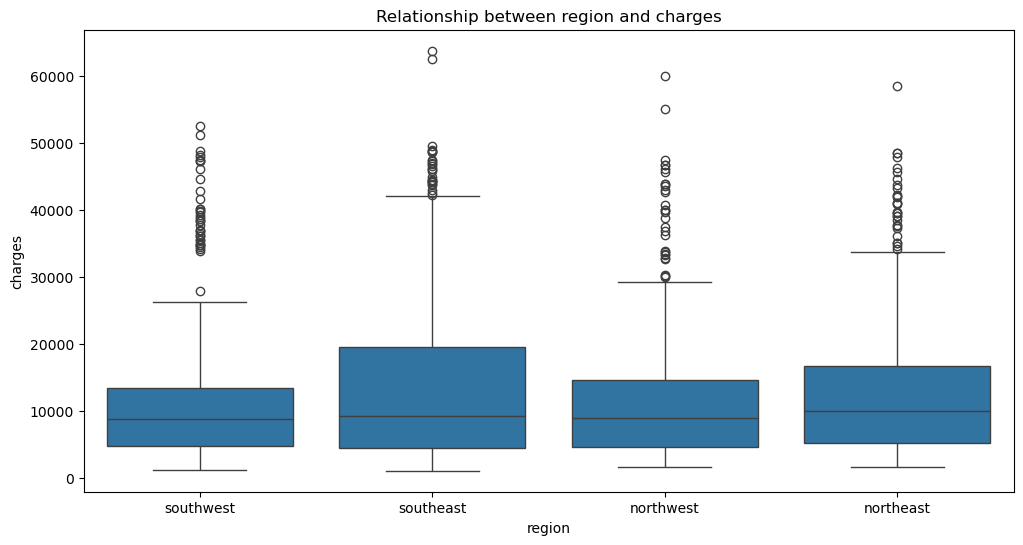

In [24]:
cat_univarates_analysis = CategoricalvsNumericalAnalysis()
cat_univarates_analysis.analyze(df, 'region', 'charges')

# How to read a boxplot

The boxplot will display:

**Box** (Interquartile Range - IQR):
The box represents the middle 50% of the data (from Q1 - 25th percentile to Q3 - 75th percentile).
The line inside the box indicates the median (Q2 - 50th percentile).

**Whiskers**:
The whiskers extend to the smallest and largest values within 1.5 times the IQR.
Data points beyond the whiskers are considered outliers.

**Outliers**:

Individual points outside the whiskers represent outliers, which may indicate anomalies or extreme values.

**Comparing Categories** (feature1):

If boxes are at different heights, there may be a significant difference in feature2 across categories.

Overlapping IQRs suggest similar distributions, while non-overlapping IQRs suggest different distributions.

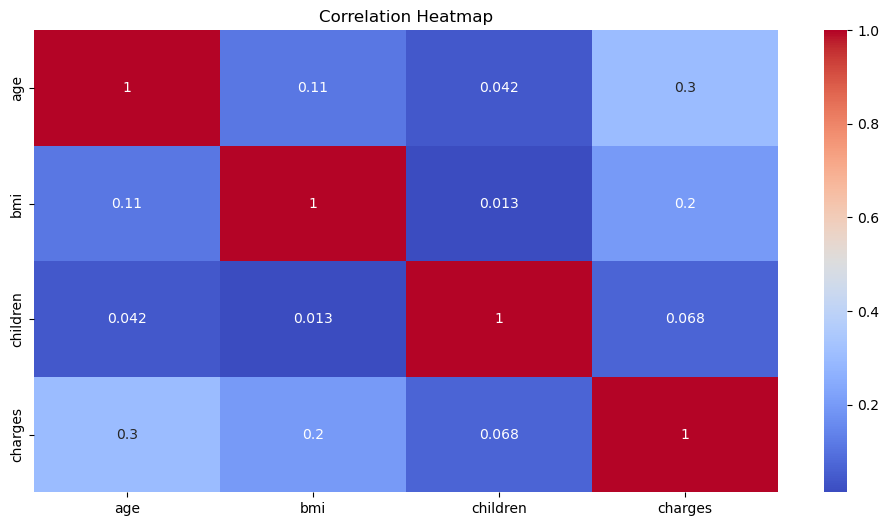

In [25]:
multivarates_analysis = SimpleMultivaratesAnalyzer()
multivarates_analysis.generate_correlation_heatmap(df)


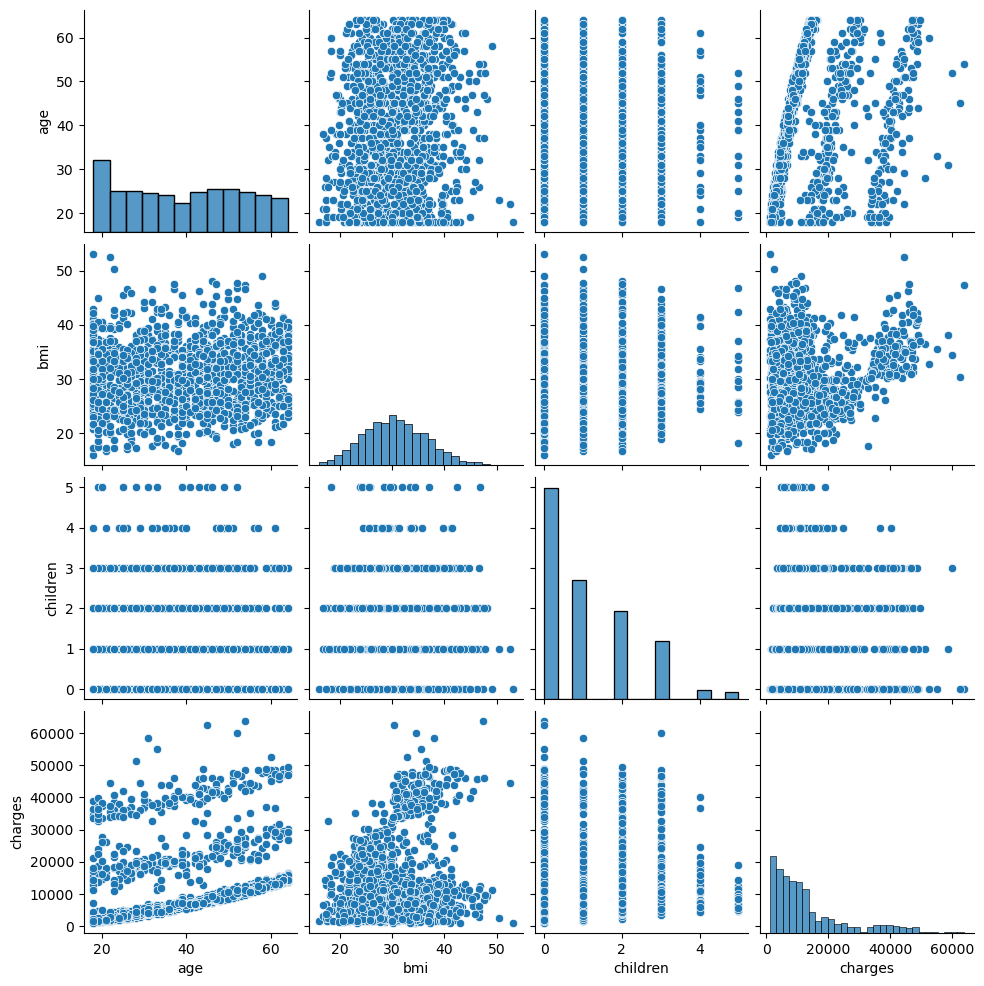

In [26]:
multivarates_analysis.generate_pairplot(df)